In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, minmax_scale

In [2]:
x = pd.read_csv('all.csv').fillna(method='bfill')
SP = pd.read_csv('^GSPC.csv')
SP = SP[['Date', 'Close']]
SP.columns = ['Date', 'sp']
x = pd.merge(x, SP, how='left', on='Date')
x.head()

,Date,A,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZBRA,ZION,vix,sp
0,2005-01-03,17.081545,29.033333,1.130179,14.5375,15.01,22.392265,26.370001,30.844999,36.389999,...,29.270000,50.090000,27.820000,44.716732,16.829618,79.379997,55.509998,67.389999,14.08,1202.079956
1,2005-01-04,16.630901,28.840000,1.141786,14.4225,14.98,22.166759,25.750000,30.030001,35.400002,...,28.440001,49.750000,27.594999,44.057972,16.606758,79.349998,54.470001,66.470001,13.98,1188.050049
2,2005-01-05,16.623749,28.893333,1.151786,14.3950,14.69,21.912466,25.650000,29.865000,35.560001,...,27.540001,49.490002,27.270000,43.188408,16.567219,78.730003,52.570000,66.230003,14.09,1183.739990
3,2005-01-06,16.258942,28.866667,1.152679,14.5175,14.52,22.406660,25.420000,29.370001,35.500000,...,27.100000,50.119999,27.400000,43.003952,16.754133,79.639999,52.650002,66.610001,13.58,1187.890015
4,2005-01-07,16.244635,28.700001,1.236607,14.4750,14.29,22.790501,26.610001,29.389999,35.549999,...,27.330000,49.790001,27.190001,42.766796,16.660675,79.500000,53.099998,64.989998,13.49,1186.189941


In [3]:
df_all = x.drop(['Date', 'vix', 'sp'], axis=1)
df = x[['Date', 'vix', 'sp']]
df.index = pd.to_datetime(df.Date)
df = df.drop('Date', axis=1)
scaler = MinMaxScaler()
df.head()

,vix,sp
Date,,
2005-01-03,14.08,1202.079956
2005-01-04,13.98,1188.050049
2005-01-05,14.09,1183.739990
2005-01-06,13.58,1187.890015
2005-01-07,13.49,1186.189941


In [30]:
# df0 = df_all.iloc[0: 418]
# df0_sc = pd.DataFrame(scaler.fit_transform(df0))
# df0_sc.loc[420] = df0_sc.iloc[-5:].mean(axis=0)
# df0_sc = df0_sc.sort_values(by=[420], axis=1)
# print(df0_sc.loc[420])
# df0_sc = df0_sc.drop(420, axis=0)

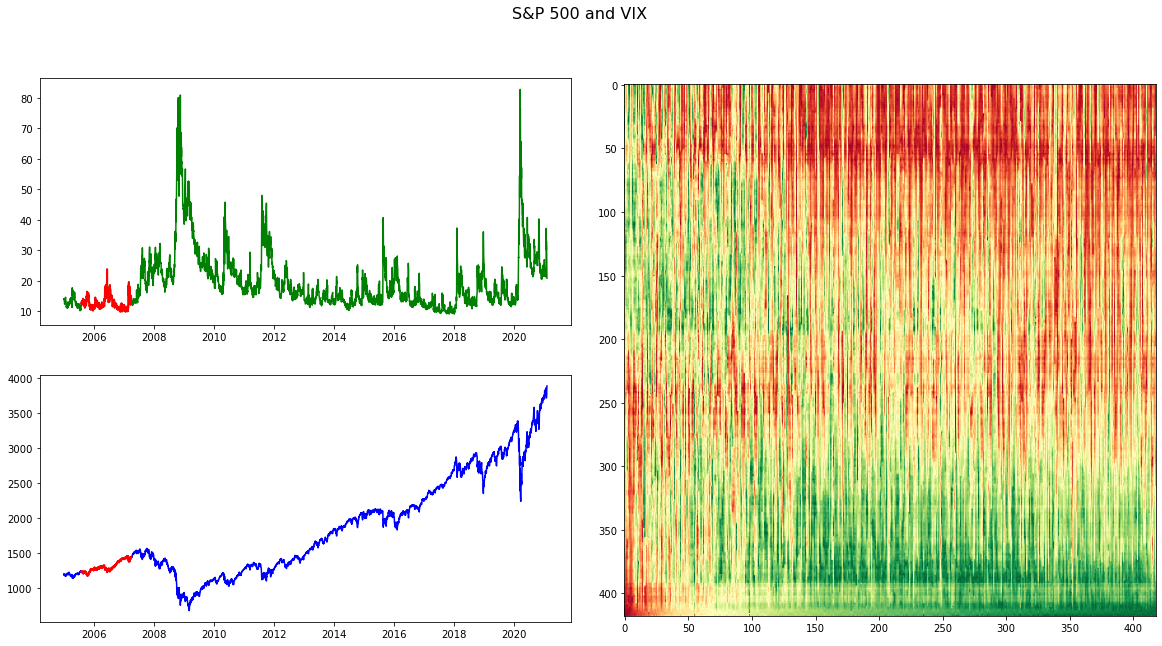

<Figure size 432x288 with 0 Axes>

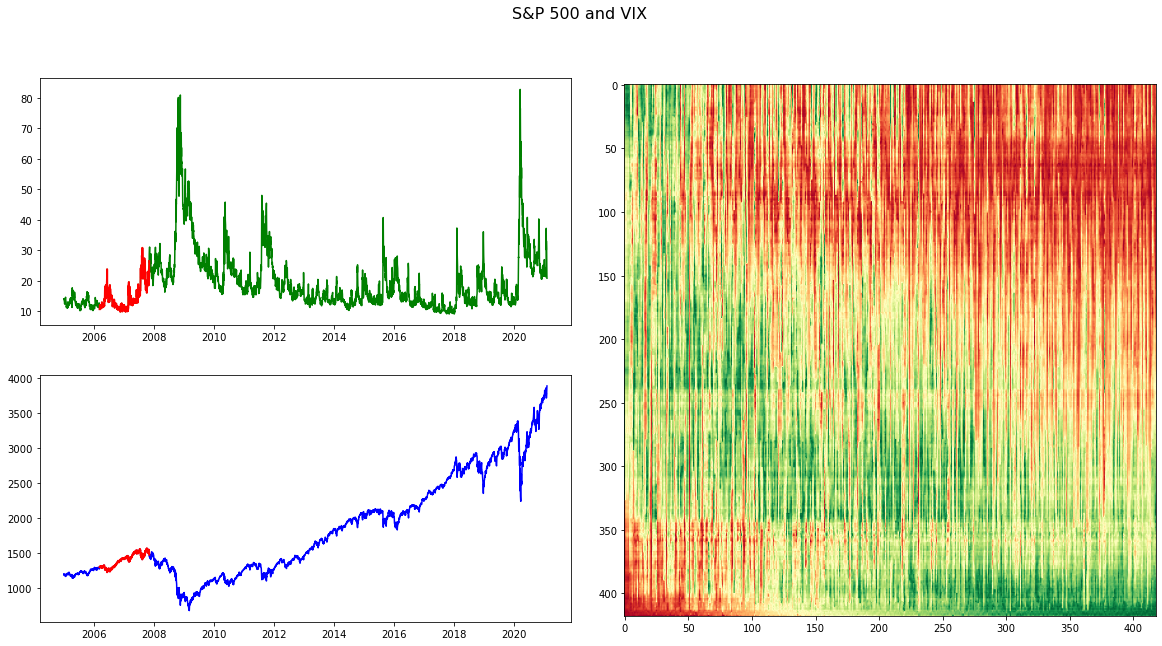

<Figure size 432x288 with 0 Axes>

In [18]:
win = 418

for i in (148, 300):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(20, 10)
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    fig.subplots_adjust(wspace=0.1)
#     fig.subplots_adjust(hspace=0.1)
    
    ax0.plot(df.vix, color='g')
    ax0.plot(df.vix[i:i+win], color='r', linewidth=2.0)
    fig.suptitle('S&P 500 and VIX', fontsize=16)
    
    ax2.plot(df.sp, color='b')
    ax2.plot(df.sp[i:i+win], color='r', linewidth=2.0)

    df0 = df_all.iloc[i: i+418]
    df0_sc = pd.DataFrame(scaler.fit_transform(df0))
    df0_sc.loc[420] = df0_sc.iloc[-5:].mean(axis=0)
    df0_sc = df0_sc.sort_values(by=[420], axis=1)
    df0_sc = df0_sc.drop(420, axis=0)
    ax1.imshow(np.array(df0_sc), cmap='RdYlGn')
#     print(df0_sc)
    
    plt.show()
    plt.clf()

In [31]:
win = 418

for i in range(3600, len(df)):
    fig, ax = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(20, 10)
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    ax2 = plt.subplot2grid((2, 2), (1, 0))
    fig.subplots_adjust(wspace=0.1)
#     fig.subplots_adjust(hspace=0.1)
    
    ax0.plot(df.vix, color='g')
    ax0.plot(df.vix[i:i+win], color='r', linewidth=2.0)
    fig.suptitle('VIX, S&P 500 and normalized changing of S&P 500 stocks', fontsize=16)
    
    ax2.plot(df.sp, color='b')
    ax2.plot(df.sp[i:i+win], color='r', linewidth=2.0)

    df0 = df_all.iloc[i: i+418]
    df0_sc = pd.DataFrame(scaler.fit_transform(df0))
    df0_sc.loc[420] = df0_sc.iloc[-5:].mean(axis=0)
    df0_sc = df0_sc.sort_values(by=[420], axis=1)
    df0_sc = df0_sc.drop(420, axis=0)
    ax1.imshow(np.array(df0_sc), cmap='RdYlGn')
    
    plt.savefig('E:/Temp/hist/{:04d}.png'.format(i))
    plt.clf()
    plt.close('all')